## Information Dataset

Sumber data: https://www.kaggle.com/aprabowo/indonesia-tourism-destination

## Import Library

In [1]:
# Data Processing
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Data Modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Avoiding warning while plotting on seaborn
import warnings
warnings.filterwarnings('ignore')

# Uploading file
import os

## Load Dataset

In [2]:
base_dir = os.path.join("indonesia_tourism/")
print("Dataset --> ", os.listdir(base_dir))

Dataset -->  ['package_tourism.csv', 'tourism_rating.csv', 'tourism_with_id.csv', 'user.csv']


In [3]:
rating = base_dir + 'tourism_rating.csv'
rating = pd.read_csv(rating)
place = base_dir + 'tourism_with_id.csv'
place = pd.read_csv(place)
user = base_dir + 'user.csv'
user = pd.read_csv(user)

### Data Place

In [4]:
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [5]:
# Drop unused column 

place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


In [6]:
# Show just Semarang
place = place[place['City']=='Semarang']
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
334,335,Candi Gedong Songo,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Budaya,Semarang,10000,4.5,NaN,"{'lat': -7.209886700000002, 'lng': 110.3421119}",-7.209887,110.342112
335,336,Grand Maerakaca,Masyarakat Jawa Tengah mungkin sudah tidak asi...,Taman Hiburan,Semarang,15000,4.4,NaN,"{'lat': -6.9605225, 'lng': 110.3863941}",-6.960522,110.386394
336,337,Kampung Pelangi,Kampung pelangi atau dalam bahasa Inggris dise...,Taman Hiburan,Semarang,3000,4.3,30.0,"{'lat': -6.988881200000001, 'lng': 110.4083781}",-6.988881,110.408378
337,338,Lawang Sewu,"Lawang Sewu (""Seribu Pintu"") (bahasa Jawa: ꦭꦮꦁ...",Budaya,Semarang,10000,4.6,NaN,"{'lat': -6.9839099, 'lng': 110.4104342}",-6.983910,110.410434
338,339,Sam Poo Kong Temple,"Sam Poo Kong (Hanzi: ; Pinyin: Sānbǎo Dòng), j...",Budaya,Semarang,35000,4.5,NaN,"{'lat': -6.996236599999999, 'lng': 110.398122}",-6.996237,110.398122


In [7]:
place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 334 to 390
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      57 non-null     int64  
 1   Place_Name    57 non-null     object 
 2   Description   57 non-null     object 
 3   Category      57 non-null     object 
 4   City          57 non-null     object 
 5   Price         57 non-null     int64  
 6   Rating        57 non-null     float64
 7   Time_Minutes  28 non-null     float64
 8   Coordinate    57 non-null     object 
 9   Lat           57 non-null     float64
 10  Long          57 non-null     float64
dtypes: float64(4), int64(2), object(5)
memory usage: 5.3+ KB


In [8]:
# Checks the dataframe has an empty value or "NaN"
place.isnull().values.any()

True

In [9]:
# Viewing the location in an empty dataframe column or "NaN"
place.loc[:, place.isnull().any()].columns

Index(['Time_Minutes'], dtype='object')

In [10]:
# View the number of empty values (NaN)
place.loc[:,list(place.loc[:,place.isnull().any()].columns)].isnull().sum()

Time_Minutes    29
dtype: int64

In [11]:
median_tm = place['Time_Minutes'].median()
place['Time_Minutes']=place['Time_Minutes'].fillna(median_tm)

In [12]:
place.shape

(57, 11)

### Data Rating

In [13]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [14]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [15]:
# change data rating so that it will contain destination rating Semarang

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,5,335,3
1,20,335,4
2,41,335,5
3,55,335,2
4,70,335,3


In [16]:
# Checks the dataframe has an empty value or "NaN"
rating.isnull().values.any()

False

In [17]:
rating.shape

(1317, 3)

### Data User

In [18]:
# look into respondents' data 

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [19]:
# change respondents' data into Semarang destination visitors

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
23,1,"Semarang, Jawa Tengah",20
725,2,"Bekasi, Jawa Barat",21
1105,3,"Cirebon, Jawa Barat",23
326,4,"Bekasi, Jawa Barat",21
0,5,"Lampung, Sumatera Selatan",20


In [20]:
# Checks the dataframe has an empty value or "NaN"
user.isnull().values.any()

False

In [21]:
user.shape

(297, 3)

## Eksploratory Data Analysis

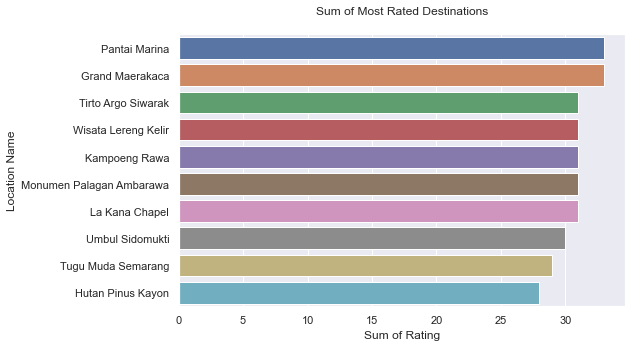

In [22]:
# creating datafram that contains locations with most rating
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# creating visualization that contains most visited destinations
plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Place_Name', data=top_10)
plt.title('Sum of Most Rated Destinations', pad=20)
plt.xlabel('Sum of Rating')
plt.ylabel('Location Name')
plt.show()

In [23]:
place['Category'].value_counts()

Cagar Alam       20
Budaya           15
Taman Hiburan    15
Bahari            4
Tempat Ibadah     3
Name: Category, dtype: int64

In [24]:
# changing the naming into English
place.Category[place.Category == 'Cagar Alam'] = 'National Park'
place.Category[place.Category == 'Budaya'] = 'Culture'
place.Category[place.Category == 'Taman Hiburan'] = 'Amusement Park'
place.Category[place.Category == 'Tempat Ibadah'] = 'Worship place'
place.Category[place.Category == 'Bahari'] = 'Marine Tourism'

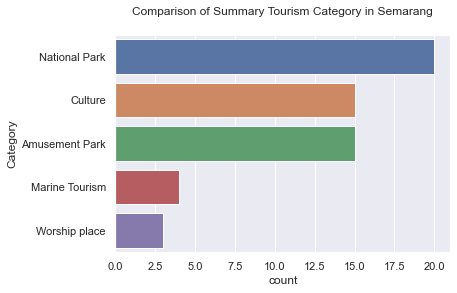

In [25]:
# creating visualization of sum category for Yogyakarta destinations

sns.countplot(y='Category', data=place, order = place['Category'].value_counts().index)
plt.title('Comparison of Summary Tourism Category in Semarang', pad=20)
plt.show()

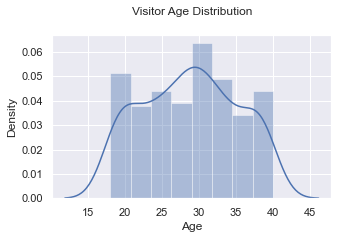

In [26]:
# visualizing visitors distribution 

plt.figure(figsize=(5,3))
sns.distplot(user['Age']);
plt.title('Visitor Age Distribution', pad=20)
plt.show()

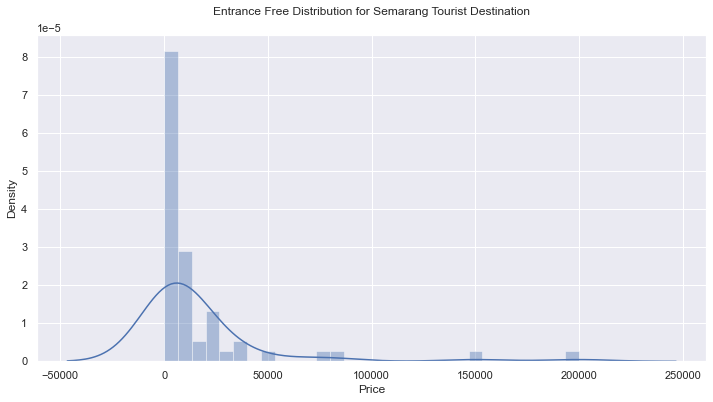

In [27]:
# visualizing entrance fee range for destinations

plt.figure(figsize=(12,6))
sns.distplot(place['Price'])
plt.title('Entrance Free Distribution for Semarang Tourist Destination', pad=20)
plt.show()

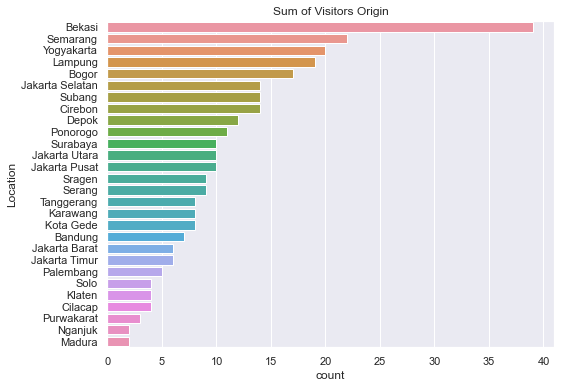

In [28]:
# filtering city origin of visitors
askot = user['Location'].apply(lambda x : x.split(',')[0])

# visualizing city origin of visitors
plt.figure(figsize=(8,6))
sns.countplot(y=askot, order = askot.value_counts().index)
plt.title('Sum of Visitors Origin')
plt.show()

## Modeling

In [29]:
# reading dataset for encoding
 
data = rating.copy()
data.head()

,User_Id,Place_Id,Place_Ratings
0,5,335,3
1,20,335,4
2,41,335,5
3,55,335,2
4,70,335,3


In [30]:
def dict_encoder(col, data=data):
    # changing column of dataframe into list with unique value
    unique_val = data[col].unique().tolist()

    # enumerating column value of dataframe 
    val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

    # encoding process from numbers to column value of dataframe
    val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
    return val_to_val_encoded, val_encoded_to_val

In [31]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id into dataframe
data['user'] = data['User_Id'].map(user_to_user_encoded)

In [32]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id into dataframe place
data['place'] = data['Place_Id'].map(place_to_place_encoded)

In [33]:
# getting length of user & place 
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
 
# changing rating into float
data['Place_Ratings'] = data['Place_Ratings'].values.astype(np.float32)
 
# getting minimum and maximum rating
min_rating, max_rating = min(data['Place_Ratings']), max(data['Place_Ratings'])
 
print(f'Number of User: {num_users} \nNumber of Place: {num_place} \nMin Rating: {min_rating} \nMax Rating: {max_rating}')

Number of User: 297 
Number of Place: 57 
Min Rating: 1.0 
Max Rating: 5.0


In [34]:
# randomizing dataset
data = data.sample(frac=1, random_state=42)
data.head()

,User_Id,Place_Id,Place_Ratings,user,place
261,83,345,4.0,176,10
991,47,377,1.0,173,42
554,288,358,5.0,225,23
49,255,336,5.0,44,1
857,238,371,3.0,228,36


In [35]:
# create variabel x for match data user and place become one value
x = data[['user', 'place']].values
 
# create variabel y for make rating from result 
y = data['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# split data with 80% data train dan 20% data validasi
train_indices = int(0.8 * data.shape[0])
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=.8, random_state=123)

In [36]:
class RecommenderNet(tf.keras.Model):
 
    # Function initialization
    def __init__(self, num_users, num_places, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_places = num_places
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
        self.places_embedding = layers.Embedding( # layer embeddings places
            num_places,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0]) # layer embedding 1
        user_bias = self.user_bias(inputs[:, 0]) # layer embedding 2
        places_vector = self.places_embedding(inputs[:, 1]) # layer embedding 3
        places_bias = self.places_bias(inputs[:, 1]) # layer embedding 4

        dot_user_places = tf.tensordot(user_vector, places_vector, 2) 

        x = dot_user_places + user_bias + places_bias

        return tf.nn.sigmoid(x) # activation sigmoid

In [37]:
model = RecommenderNet(num_users, num_place, 50) # model initialization
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [38]:
# begin the training
 
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
33/33 [==============================] - 2s 16ms/step - loss: 0.7300 - root_mean_squared_error: 0.3666 - val_loss: 0.7258 - val_root_mean_squared_error: 0.3697
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7314 - root_mean_squared_error: 0.3677 - val_loss: 0.7278 - val_root_mean_squared_error: 0.3708
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7295 - root_mean_squared_error: 0.3676 - val_loss: 0.7286 - val_root_mean_squared_error: 0.3710
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7256 - root_mean_squared_error: 0.3655 - val_loss: 0.7285 - val_root_mean_squared_error: 0.3705
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.7446 - root_mean_squared_error: 0.3750 - val_loss: 0.7269 - val_root_mean_squared_error: 0.3699
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7141 - root_mean_squared_error: 0.3572 - val_loss: 0.7226 - val_root_

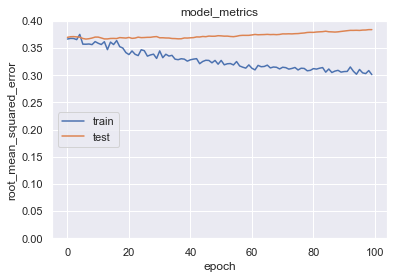

In [39]:
# showing the plot loss and validation
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

## Recommendation

In [40]:
# dataframe preparation
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
data = rating.copy()

In [41]:
# user sampling
user_id = data.User_Id.sample(1).iloc[0]
place_visited_by_user = data[data.User_Id == user_id]

In [42]:
# unvisited location data
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [43]:
# top 10 recommendations
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Recommendation list for: {} \n\n'.format('User ' + str(user_id)))
print('====' * 15)
print('Places with highest rating from users')
print('====' * 15)
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows[['place_name', 'category']])


2/2 [==============================] - 0s 0s/step
Recommendation list for: User 285 


Places with highest rating from users


,place_name,category
356,Wisata Alam Wana Wisata Penggaron,National Park
376,La Kana Chapel,Amusement Park
383,Kampung Tematik Jawi,Culture
385,Air Terjun Semirang,National Park
387,Watu Gunung Ungaran,National Park


In [44]:
print('\n')
print('====' * 15)
print('Top 10 place recommendations')
print('====' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
pd.DataFrame(recommended_place[['place_name', 'category', 'rating', 'price']])



Top 10 place recommendations


,place_name,category,rating,price
341,Taman Kasmaran,Amusement Park,4.5,3000
346,Taman Pandanaran,Amusement Park,4.4,0
352,Taman Srigunting,Amusement Park,4.7,0
357,Masjid Kapal Semarang,Worship place,4.1,0
366,Wisata Lereng Kelir,National Park,4.3,7000
371,Gua Maria Kerep Ambarawa,National Park,4.8,2000
373,Hutan Pinus Kayon,National Park,4.4,6000
379,Masjid Agung Ungaran,Worship place,4.7,0
381,Kampoeng Kopi Banaran,Amusement Park,4.3,200000
386,Obyek Wisata Goa Kreo,National Park,4.3,5500
